# Module 4 

Question 3

Does the Complaint Type that you identified in response to Question 1 have an obvious relationship with any particular characteristic or characteristic of the Houses?

### Import Libraries

In [8]:
from botocore.client import Config
import types
import ibm_boto3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load Data
 - PLUTO Dataset
 - 311 Calls

In [11]:
client_cred.download_file(Bucket=bucket,Key='df_raw_cos.pkl',Filename='./df_raw_local.pkl')
df = pd.read_pickle('./df_raw_local.pkl')

In [12]:
df.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-12-10T09:07:56.000,45131499,GENERAL,11226.0,90 EAST 18 STREET,EAST 18 STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.648965,-73.962994,NaN,RESIDENTIAL BUILDING,Open
1,2019-12-10T03:53:20.000,45130500,PLUMBING,11691.0,20-33 SEAGIRT BOULEVARD,SEAGIRT BOULEVARD,ADDRESS,Far Rockaway,The following complaint conditions are still o...,QUEENS,40.595176,-73.755376,NaN,RESIDENTIAL BUILDING,Open
2,2019-12-10T16:17:03.000,45131649,HEAT/HOT WATER,10025.0,504 WEST 111 STREET,WEST 111 STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.803907,-73.964063,NaN,RESIDENTIAL BUILDING,Open
3,2019-12-10T22:09:16.000,45130383,HEAT/HOT WATER,11233.0,1572 EASTERN PARKWAY EXTENSION,EASTERN PARKWAY EXTENSION,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.671014,-73.916204,NaN,RESIDENTIAL BUILDING,Open
4,2019-12-10T18:30:00.000,45130428,HEAT/HOT WATER,11213.0,1338 BERGEN STREET,BERGEN STREET,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.675561,-73.940256,NaN,RESIDENTIAL BUILDING,Open


In [13]:
df_pluto_bk.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BK,1,1,302,21.0,NaN,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,3.000010e+09,11/26/2013,1,1.0,1.0,18V1
1,BK,1,50,302,21.0,2000.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,E-231,0.000000e+00,NaN,1,1.0,1.0,18V1
2,BK,1,7501,302,21.0,2000.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,3.000010e+09,03/04/2016,1,1.0,1.0,18V1
3,BK,3,1,302,21.0,3002.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,1,1.0,1.0,18V1
4,BK,3,5,302,21.0,NaN,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,4,1.0,1.0,18V1


### Clean Data


In [14]:
df = df[df['borough'] == 'BROOKLYN']

One hot encoding to label incident type heating or non-heating incident

In [15]:
# convert to binary 
df['complaint_type'] = df['complaint_type'].map(lambda x : 1 if (x =='HEATING'or x == "HEAT/HOT WATER") else 0)

In [16]:
df['complaint_type'].value_counts()

0    1158960
1     562030
Name: complaint_type, dtype: int64



Use suggested columns to limit to make use of data more manageable

In [17]:
# use suggested columns
columns = ['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 
           'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 
           'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']
df_pluto_bk = df_pluto_bk[columns]

### Combine Dataset

Merge two datasets using left join to keep same numder of datapoints for further analysis

In [18]:
df_pluto_bk.rename(columns = {'Address':'incident_address'}, inplace = True)
df = df.merge( df_pluto_bk, on = 'incident_address', how = 'left')

### EDA

Drop null values and duplicate columns for modeling

In [19]:
df.dropna(inplace=True)
df = df.drop(columns = ['unique_key', 'address_type', 'incident_zip', 'YCoord', 'XCoord'])

Look at correlation to complaint type to indetify house features

In [20]:
df.corr().complaint_type

complaint_type    1.000000
latitude         -0.071156
longitude        -0.079909
BldgArea          0.064122
BldgDepth         0.043724
BuiltFAR          0.012522
CommFAR          -0.007610
FacilFAR         -0.004647
Lot               0.044657
LotArea           0.037003
LotDepth          0.021680
NumBldgs          0.009004
NumFloors         0.062666
OfficeArea        0.004592
ResArea           0.063535
ResidFAR          0.022554
RetailArea        0.004740
YearBuilt         0.015178
YearAlter1        0.006380
ZipCode           0.002401
Name: complaint_type, dtype: float64

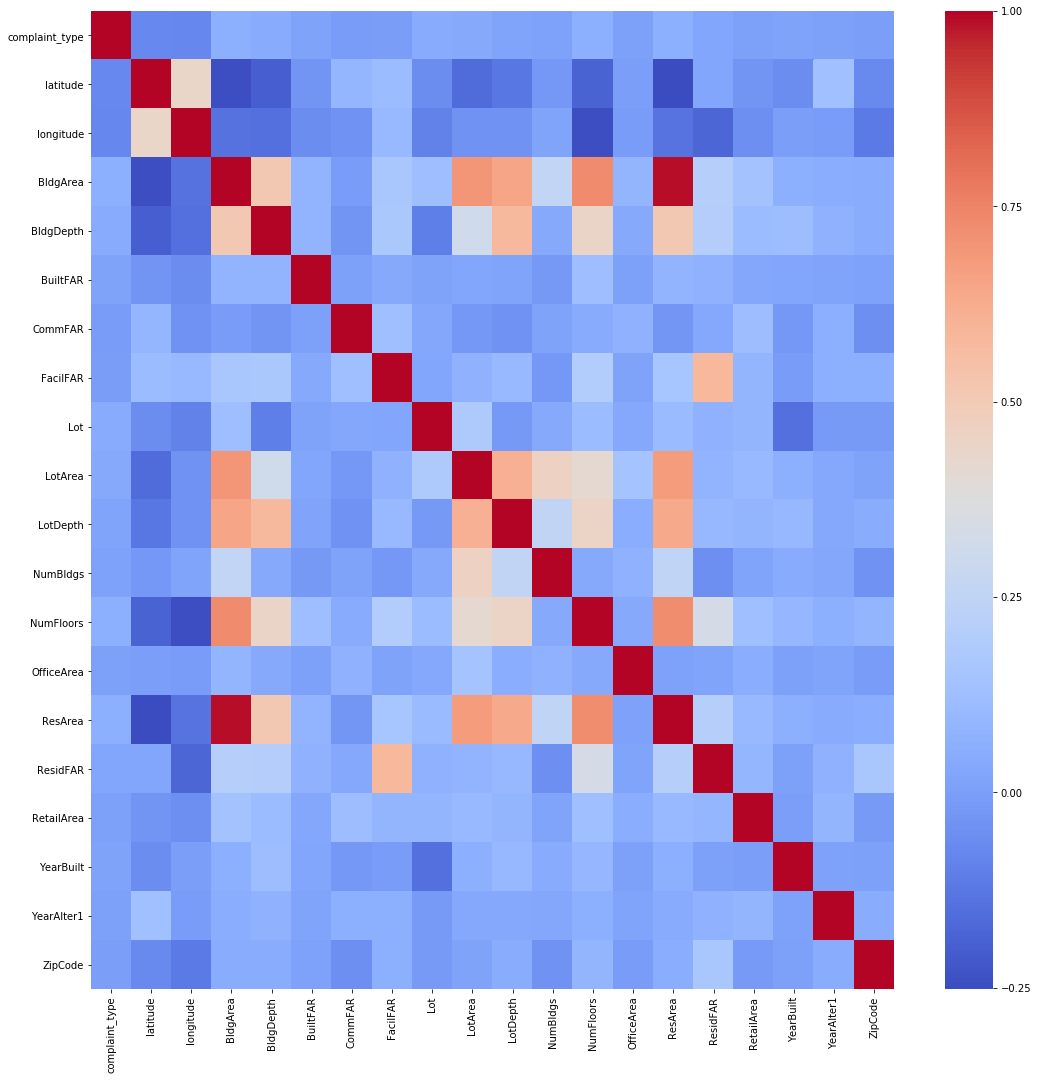

In [21]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(),  cmap = 'coolwarm');

In [22]:
df.describe()

,complaint_type,latitude,longitude,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode
count,1.373231e+06,1.373231e+06,1.373231e+06,1.373231e+06,1.373231e+06,1.373231e+06,1.373231e+06,1.373231e+06,1.373231e+06,1.373231e+06,1.373231e+06,1.373231e+06,1.373231e+06,1.373231e+06,1.373231e+06,1.373231e+06,1.373231e+06,1.373231e+06,1.373231e+06,1.373231e+06
mean,3.254063e-01,4.065977e+01,-7.394610e+01,3.174092e+04,8.293969e+01,2.760015e+00,8.838986e-02,3.595591e+00,1.232906e+02,9.926653e+03,1.136943e+02,1.113931e+00,4.148786e+00,8.924268e+01,3.072663e+04,2.420039e+00,4.539333e+02,1.923514e+03,3.259872e+02,1.121938e+04
std,4.685266e-01,2.932595e-02,3.414347e-02,5.635509e+04,4.340059e+01,7.114634e+00,5.390829e-01,1.302263e+00,7.964002e+02,2.460619e+04,5.068159e+01,6.660889e-01,2.072897e+00,3.783289e+03,5.508788e+04,1.020356e+00,1.764221e+03,1.000419e+02,7.379493e+02,1.031143e+01
min,0.000000e+00,4.057197e+01,-7.404082e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.120100e+04
25%,0.000000e+00,4.064185e+01,-7.396159e+01,4.125000e+03,5.700000e+01,1.755000e+00,0.000000e+00,2.000000e+00,1.400000e+01,2.454000e+03,1.000000e+02,1.000000e+00,3.000000e+00,0.000000e+00,3.588000e+03,2.000000e+00,0.000000e+00,1.916000e+03,0.000000e+00,1.121000e+04
50%,0.000000e+00,4.066396e+01,-7.394871e+01,1.200000e+04,8.000000e+01,2.750000e+00,0.000000e+00,4.000000e+00,3.200000e+01,4.100000e+03,1.000000e+02,1.000000e+00,4.000000e+00,0.000000e+00,1.097100e+04,2.430000e+00,0.000000e+00,1.928000e+03,0.000000e+00,1.121900e+04
75%,1.000000e+00,4.067974e+01,-7.392411e+01,4.390000e+04,9.300000e+01,3.590000e+00,0.000000e+00,4.800000e+00,5.300000e+01,1.200000e+04,1.170000e+02,1.000000e+00,6.000000e+00,0.000000e+00,4.272000e+04,3.000000e+00,0.000000e+00,1.931000e+03,0.000000e+00,1.122600e+04
max,1.000000e+00,4.073743e+01,-7.385578e+01,1.800000e+06,7.360000e+03,5.801000e+03,1.200000e+01,1.200000e+01,7.519000e+03,7.446955e+06,2.285000e+03,1.420000e+02,1.190000e+02,8.565430e+05,1.800000e+06,1.000000e+01,2.092500e+05,2.017000e+03,2.017000e+03,1.124900e+04


### Export Data

In [23]:
# convert file to .pkl 
df.to_pickle('./combined_raw.pkl')

# upload to cloud for use in later notebooks
client_cred.upload_file('./combined_raw.pkl',bucket,'combined_raw_cos.pkl')

### Conclusion

There was no specific characteristic of the building I found to be related to the severity of the complaint. Further analysis is required